In [782]:

## Import Python libraries


import pandas as pd



import numpy as np



import matplotlib.pyplot as plt



import seaborn as sns



from sklearn.compose import ColumnTransformer



from sklearn.pipeline import make_pipeline



from sklearn.preprocessing import(
    
    
    
    FunctionTransformer,
    
    

    
    StandardScaler
    
    
)




from sklearn.model_selection import train_test_split




from sklearn.pipeline import Pipeline



import xgboost as xgb


from xgboost import XGBRegressor 



from sklearn.metrics import mean_absolute_error



from sklearn.ensemble import HistGradientBoostingRegressor


from sklearn.metrics import mean_squared_error, r2_score



from sklearn.metrics import mean_poisson_deviance



from scipy.special import factorial



from scipy.optimize import minimize



from pyglmnet import GLM



from sklearn.base import BaseEstimator, RegressorMixin




from sklearn.model_selection import  KFold




import glmnetforpython as glmnet



from time import time












In [783]:

# Read data



data = pd.read_csv('../Data/LungCancerData.csv')



data.head()




,ZCTA5,Zip_name,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,...,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,case_n_18plus
0,20105,ZCTA5 20105,13996,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,...,0.371535,0.185767,0.185767,17.1,11.9,22.5,153314.0,7.801598,1.0,15.0
1,20106,ZCTA5 20106,4091,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,...,0.000000,0.000000,0.000000,17.7,17.8,32.2,82500.0,7.171176,18.0,21.0
2,20109,ZCTA5 20109,29499,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,...,0.918675,0.227126,0.691549,17.4,18.3,36.6,70629.0,7.940322,72.0,68.0
3,20110,ZCTA5 20110,36041,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,...,1.048806,0.413418,0.635387,17.8,17.9,31.7,81042.0,8.013779,50.0,102.0
4,20111,ZCTA5 20111,26293,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,...,0.981250,0.532461,0.448789,17.3,18.6,33.8,88207.0,8.080360,56.0,66.0


In [784]:
data.shape

(896, 34)

In [785]:
data.columns.tolist()


['ZCTA5',
 'Zip_name',
 'Population_18andOver',
 'Pct_Civilian_Unemployed',
 'Pct_BelowPoverty_18andOver',
 'Pct_Population_Male_18andOver',
 'Pct_Population_65andOver',
 'Pct_Population_Male_65andOver',
 'Pct_Population_Female_65andOver',
 'Pct_Black_18andOver',
 'Pct_Black_Male_18andOver',
 'Pct_Black_Female_18andOver',
 'Pct_Black_65andOver',
 'Pct_Black_Male_65andOver',
 'Pct_Black_Female_65andOver',
 'Pct_White_18andOver',
 'Pct_White_Male_18andOver',
 'Pct_White_Female_18andOver',
 'Pct_White_65andOver',
 'Pct_White_Male_65andOver',
 'Pct_White_Female_65andOver',
 'Pct_Hisp_18andOver',
 'Pct_Hisp_Male_18andOver',
 'Pct_Hisp_Female_18andOver',
 'Pct_Hisp_65andOver',
 'Pct_Hisp_Male_65andOver',
 'Pct_Hisp_Female_65andOver',
 'BINGE_CrudePrev',
 'CSMOKING_CrudePrev',
 'OBESITY_CrudePrev',
 'Median_Household_Income',
 'ZCTA_pm2_5',
 'sdi_score',
 'case_n_18plus']

In [786]:
data['ZCTA5']



0      20105
1      20106
2      20109
3      20110
4      20111
       ...  
891    24646
892    24649
893    24651
894    24656
895    24657
Name: ZCTA5, Length: 896, dtype: int64

In [787]:

data['ZCTA5'].dtype



dtype('int64')

In [788]:
data['ZCTA5'].unique().shape

(896,)

In [789]:


# Remove Zipcodes having missing data




ZipCodes = np.array([22035, 22185, 22214, 23250, 24316, 23440])




In [790]:


subdata = data[~data['ZCTA5'].isin(ZipCodes)]



In [791]:
subdata.head()

,ZCTA5,Zip_name,Population_18andOver,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,...,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,case_n_18plus
0,20105,ZCTA5 20105,13996,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,...,0.371535,0.185767,0.185767,17.1,11.9,22.5,153314.0,7.801598,1.0,15.0
1,20106,ZCTA5 20106,4091,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,...,0.000000,0.000000,0.000000,17.7,17.8,32.2,82500.0,7.171176,18.0,21.0
2,20109,ZCTA5 20109,29499,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,...,0.918675,0.227126,0.691549,17.4,18.3,36.6,70629.0,7.940322,72.0,68.0
3,20110,ZCTA5 20110,36041,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,...,1.048806,0.413418,0.635387,17.8,17.9,31.7,81042.0,8.013779,50.0,102.0
4,20111,ZCTA5 20111,26293,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,...,0.981250,0.532461,0.448789,17.3,18.6,33.8,88207.0,8.080360,56.0,66.0


In [792]:
subdata.shape

(890, 34)

In [793]:
subdata.dropna().shape[0]

788

In [794]:

## Missing data in lung cancer cases among individuals aged 18 and above


subdata.shape[0] - subdata['case_n_18plus'].dropna().shape[0]



62

In [795]:

## Missing data in lung cancer cases among individuals aged 18 and above



100 - (subdata['case_n_18plus'].dropna().shape[0]/subdata.shape[0])*100



6.966292134831463

In [796]:

## Remove missing data


cleaneddata = subdata.dropna()



In [797]:
cleaneddata.shape

(788, 34)

In [798]:
cleaneddata['case_n_18plus'].mean()

np.float64(34.80329949238579)

In [799]:
cleaneddata['case_n_18plus'].var()

np.float64(1782.8494427208634)

In [800]:
cleaneddata['case_n_18plus'].std()

np.float64(42.22380185062524)

In [801]:
# Since mean and variance are different, there is overdispersion in the data


(array([450., 145.,  69.,  46.,  28.,  21.,  11.,   6.,   9.,   3.]),
 array([  1. ,  24.3,  47.6,  70.9,  94.2, 117.5, 140.8, 164.1, 187.4,
        210.7, 234. ]),
 <BarContainer object of 10 artists>)

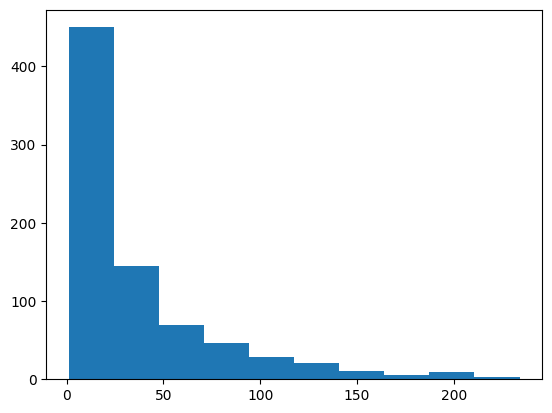

In [802]:


plt.hist(cleaneddata['case_n_18plus'])



In [803]:

cleaneddata['case_n_18plus'].min()



np.float64(1.0)

In [804]:

cleaneddata['case_n_18plus'].max()



np.float64(234.0)


# Available features 

1. Demographics: Gender (F, M), Race (Black, White, Other), Ethnicity (Hispanic, Latino,  Not Hispanic or Latino), Age 


 * In particular: Percentage of males, Percentage of Blacks, Percentage of  Whites, Percentage of Hispanics


 * The impact of race, specifically Black or White, on the prevalence of Lung cancer was measured against the  category ‘Other’, which includes Asian, Native Hawaiians and Other Pacific Islanders (NHPI), American Indian and Alaska Natives, some other race alone, and two or more races



 * The effect of age will be incorporated into the model through the variable such as percentage of population with age ≥ 65


2. Prevalence of Binge Drinking, Smoking, and Obesity


3. Percent Population below Poverty


4. Social Deprivation Index (SDI)


 * It quantify the socioeconomic variation in health outcomes
 
 * It is a deprivation based on seven demographic characteristics 


 * The seven demographic characteristics include: 
 
      - Percent living in poverty  
      - Percent with less than 12 years of education
      - Percent single-parent households
      - Percent living in rented housing units
      - Percent living in overcrowded housing units
      - Percent of households without a car  and 
      - Percent unemployed adults under 65 years of age


 * Its value range from 1 to 100, with higher values reflecting greater deprivation



5. Average Daily Air Quality PM2.5 Concentration: Particulate matter with a diameter of 2.5 micrometers or less



In [805]:

## Select features that we want to include in the modelling




variables = np.array(cleaneddata.columns.tolist())



variables



array(['ZCTA5', 'Zip_name', 'Population_18andOver',
       'Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_18andOver', 'Pct_Population_65andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_18andOver', 'Pct_Black_Male_18andOver',
       'Pct_Black_Female_18andOver', 'Pct_Black_65andOver',
       'Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_18andOver', 'Pct_White_Male_18andOver',
       'Pct_White_Female_18andOver', 'Pct_White_65andOver',
       'Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_18andOver', 'Pct_Hisp_Male_18andOver',
       'Pct_Hisp_Female_18andOver', 'Pct_Hisp_65andOver',
       'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score',
       'case_n_18plus'], dtype='<U31')

In [806]:


removecolumns = np.array(['ZCTA5', 'Zip_name', 'case_n_18plus', 'Population_18andOver'])



removecolumns




array(['ZCTA5', 'Zip_name', 'case_n_18plus', 'Population_18andOver'],
      dtype='<U20')

In [807]:


# Response variable


y = cleaneddata['case_n_18plus']


y

0       15.0
1       21.0
2       68.0
3      102.0
4       66.0
       ...  
891      2.0
892     11.0
893     34.0
894     13.0
895      1.0
Name: case_n_18plus, Length: 788, dtype: float64



## Mathematical formulation


If we define the number of cases $Y_{i}$ in terms of the population $N_{i}$ with a given intensity $\lambda_{i}$,
we assume that cases $Y_{i}$ arise as a Poisson process with rate $\lambda_{i}$, which represents the expected number of cases per individual in the population $N_{i}$


Let

* $Y_{i}$ be the total number of cases
* $N_{i}$ be the total population
* $\lambda_{i}$ be the intensity rate, defined as the expected number of cases per individual
    
    



We assume that each individual independently experiences a case occurrence with rate $\lambda_{i}$



Then, the total number of cases $Y_{i}$ follows a Poisson distribution:
    
    

\begin{align}
 Y_{i} \sim \text{Poisson}(\lambda_{i} N_{i})
\end{align}

This means that the probability of observing exactly $k$ cases is:

\begin{align}
P(Y_{i} = k) = \frac{(\lambda_{i} N_{i})^k e^{-\lambda_{i} N_{i}}}{k!}
\end{align}

where
* $\lambda_{i} N_{i}$ is the expected number of cases in the population
* $k!$ is the factorial of $k$
    




In [808]:


N = cleaneddata['Population_18andOver']



N



0      13996
1       4091
2      29499
3      36041
4      26293
       ...  
891      710
892     2351
893     4316
894     2356
895      268
Name: Population_18andOver, Length: 788, dtype: int64

In [809]:


## Features



xvariable = variables[~pd.Series(variables).isin(removecolumns)]


xvariable



array(['Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_18andOver', 'Pct_Population_65andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_18andOver', 'Pct_Black_Male_18andOver',
       'Pct_Black_Female_18andOver', 'Pct_Black_65andOver',
       'Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_18andOver', 'Pct_White_Male_18andOver',
       'Pct_White_Female_18andOver', 'Pct_White_65andOver',
       'Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_18andOver', 'Pct_Hisp_Male_18andOver',
       'Pct_Hisp_Female_18andOver', 'Pct_Hisp_65andOver',
       'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score'], dtype='<U31')

In [810]:

xdata = cleaneddata[xvariable]


xdata

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,Pct_Black_Female_18andOver,Pct_Black_65andOver,...,Pct_Hisp_Female_18andOver,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score
0,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,5.244356,5.894541,0.685910,...,3.958274,0.371535,0.185767,0.185767,17.1,11.9,22.5,153314.0,7.801598,1.0
1,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,1.686629,1.613297,0.562210,...,2.371058,0.000000,0.000000,0.000000,17.7,17.8,32.2,82500.0,7.171176,18.0
2,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,7.993491,8.749449,1.247500,...,16.841249,0.918675,0.227126,0.691549,17.4,18.3,36.6,70629.0,7.940322,72.0
3,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,8.135179,6.473183,1.459449,...,13.861991,1.048806,0.413418,0.635387,17.8,17.9,31.7,81042.0,8.013779,50.0
4,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,5.339824,4.290115,1.361579,...,14.600844,0.981250,0.532461,0.448789,17.3,18.6,33.8,88207.0,8.080360,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,5.9,26.901408,54.366197,19.154930,11.267606,7.887324,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.3,29.6,35.9,25625.0,8.217162,60.0
892,8.4,20.799660,50.999575,13.100808,7.230966,5.869843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.7,29.2,36.7,41318.0,8.007121,52.0
893,6.7,12.025316,49.606117,26.459685,11.329935,15.129750,4.147359,3.174235,0.973123,0.417053,...,0.000000,0.000000,0.000000,0.000000,14.7,22.3,38.7,47820.0,7.577166,54.0
894,2.9,23.047538,53.098472,29.668930,13.412564,16.256367,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.8,30.1,36.6,34668.0,8.219753,45.0


In [811]:


xdata.shape



(788, 30)

In [812]:

y.shape


(788,)

In [813]:




def PlotFeaturesVsResponse(X: pd.DataFrame, y: pd.Series, ncols: int = 2, figsize: tuple = (10, 10)) -> plt.Figure:
    

    
    n_rows, ncols_to_plot = divmod(X.shape[1], ncols)
    
    
    
    n_rows += int(ncols_to_plot > 0)
    
    

    # Create figure and axes
    
    
    f, axs = plt.subplots(nrows = n_rows, ncols = ncols, figsize = figsize)
    
    

    # Iterate through columns and plot against y
    
    
    
    for ax, col in zip(axs.flat, X.columns):
        
        
        
        ax.scatter(X[col], y, alpha = 0.1, marker='.', color = "blue")
        
        
        
        ax.set_title(col)
        
        

    # Remove any unused subplots
    
    
    
    for ax in axs.flat[len(X.columns) :]:
        
        
        
        ax.set_axis_off()
        
        

    # Display the figure
    
    
    
    plt.tight_layout()
    
    
    
    return f





The plot of the features against the response variable


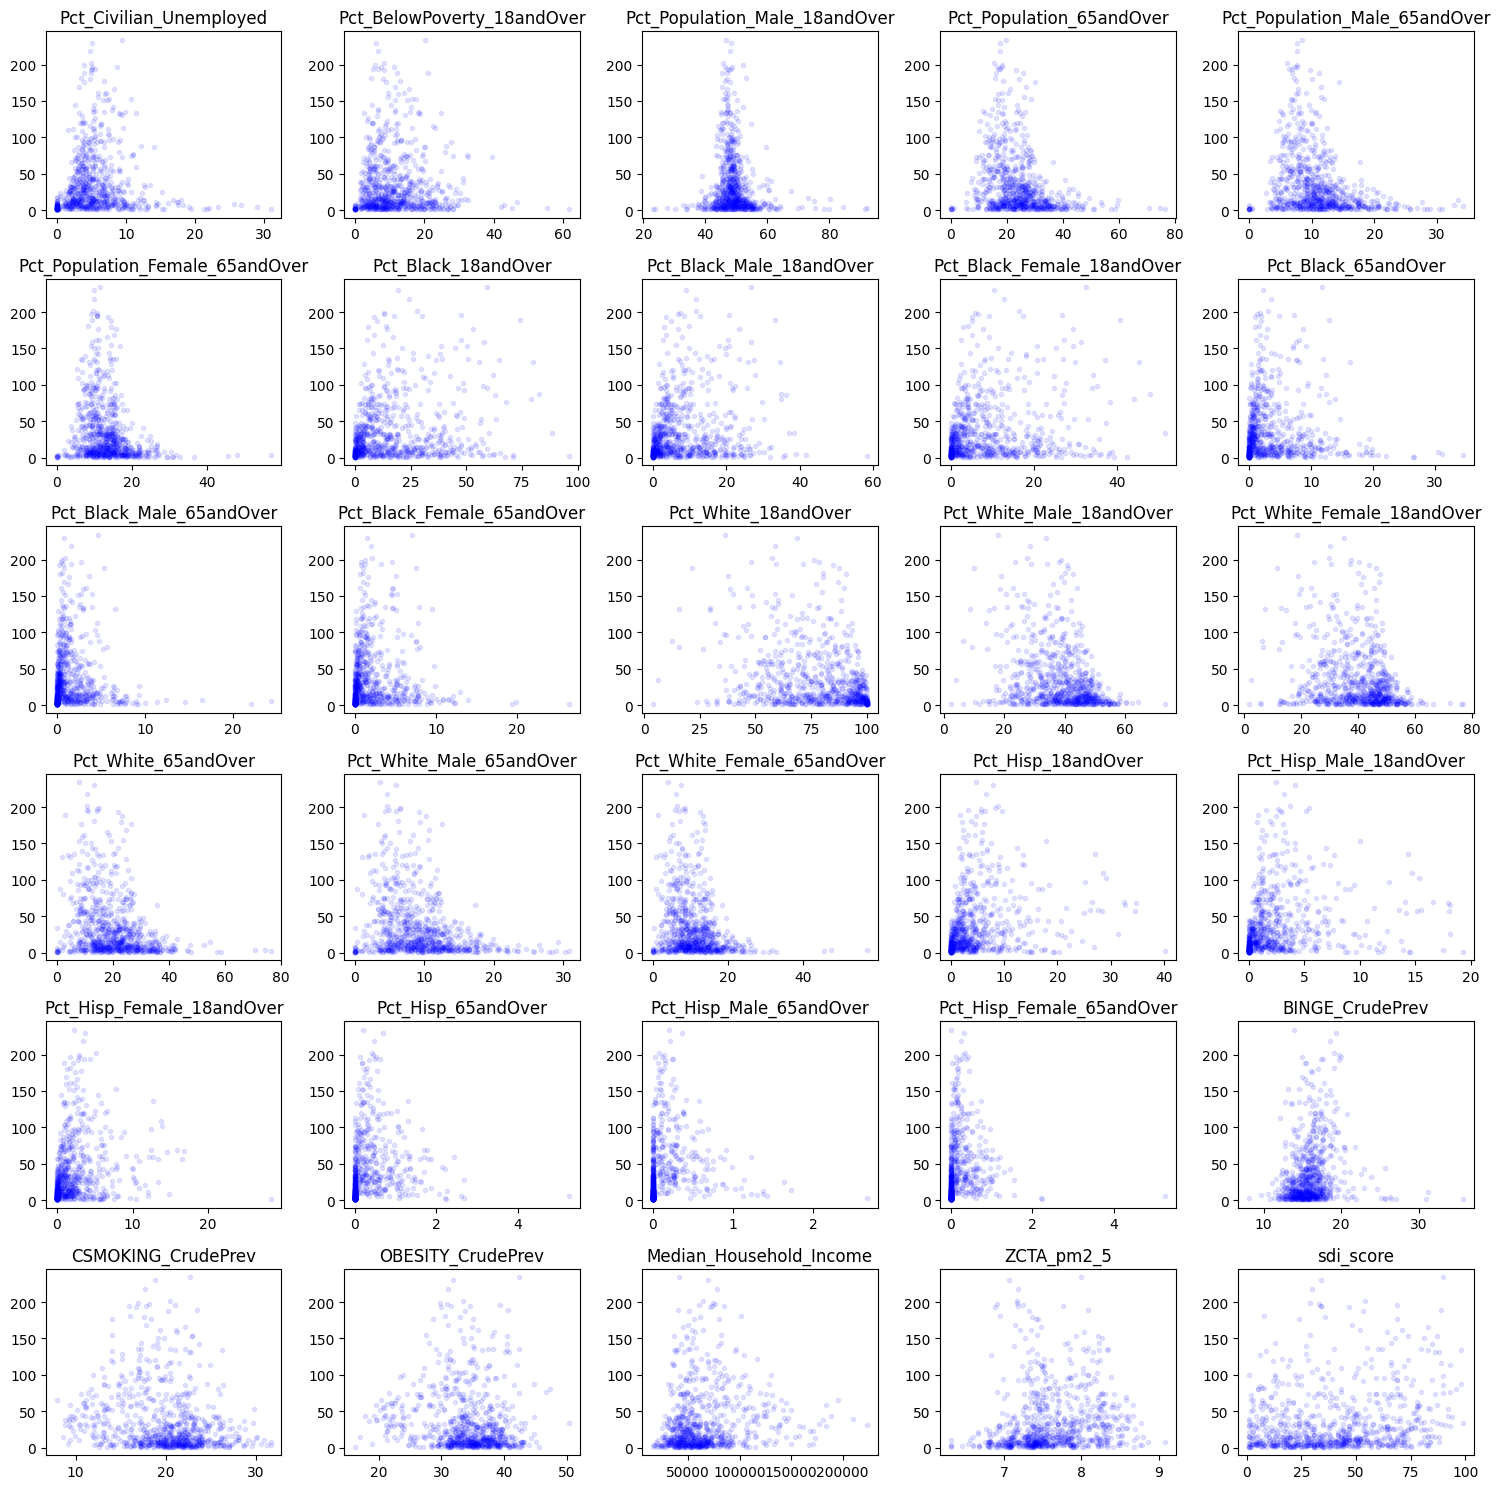

In [814]:


print(f"The plot of the features against the response variable")


f = PlotFeaturesVsResponse(xdata, y, ncols = 5,  figsize = (15, 15))





No linear relationship between each features and the response



## Pairwise correlation between features

In [815]:

corr_matrix = xdata.corr()




corr_matrix






,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,Pct_Black_Female_18andOver,Pct_Black_65andOver,...,Pct_Hisp_Female_18andOver,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score
Pct_Civilian_Unemployed,1.000000,0.284317,-0.007922,-0.077711,-0.092958,-0.047935,0.162913,0.156366,0.155727,0.108836,...,-0.012699,-0.052109,-0.057263,-0.033125,-0.061228,0.288750,0.231296,-0.251756,0.117333,0.420174
Pct_BelowPoverty_18andOver,0.284317,1.000000,0.059129,-0.004378,-0.035400,0.023592,0.163803,0.162618,0.151827,0.120090,...,-0.160347,-0.178356,-0.156583,-0.142878,-0.207701,0.568748,0.417567,-0.600622,0.074323,0.750921
Pct_Population_Male_18andOver,-0.007922,0.059129,1.000000,-0.223480,-0.011917,-0.360478,-0.018244,0.175932,-0.187700,-0.097574,...,-0.045185,-0.021373,-0.021756,-0.014882,0.330378,0.086707,-0.020899,-0.011925,-0.020952,0.011337
Pct_Population_65andOver,-0.077711,-0.004378,-0.223480,1.000000,0.868894,0.902128,-0.112705,-0.135682,-0.083524,0.191439,...,-0.368330,-0.162674,-0.151515,-0.123805,-0.538285,0.159678,0.206237,-0.293114,-0.262281,-0.118890
Pct_Population_Male_65andOver,-0.092958,-0.035400,-0.011917,0.868894,1.000000,0.570277,-0.113260,-0.102553,-0.113681,0.174959,...,-0.341283,-0.142334,-0.127041,-0.112462,-0.448386,0.132868,0.162476,-0.221699,-0.264049,-0.152033
Pct_Population_Female_65andOver,-0.047935,0.023592,-0.360478,0.902128,0.570277,1.000000,-0.088311,-0.135774,-0.039518,0.165189,...,-0.313764,-0.145893,-0.140703,-0.107426,-0.502448,0.149171,0.200628,-0.293179,-0.205097,-0.064778
Pct_Black_18andOver,0.162913,0.163803,-0.018244,-0.112705,-0.113260,-0.088311,1.000000,0.951843,0.962904,0.798901,...,0.019940,-0.047083,-0.032335,-0.044454,-0.212795,0.161715,0.466952,-0.203876,0.042459,0.394691
Pct_Black_Male_18andOver,0.156366,0.162618,0.175932,-0.135682,-0.102553,-0.135774,0.951843,1.000000,0.833802,0.730725,...,0.024878,-0.039095,-0.030975,-0.033824,-0.152152,0.176389,0.444237,-0.199528,0.038886,0.376491
Pct_Black_Female_18andOver,0.155727,0.151827,-0.187700,-0.083524,-0.113681,-0.039518,0.962904,0.833802,1.000000,0.795408,...,0.014008,-0.050371,-0.030963,-0.050277,-0.249257,0.135946,0.449830,-0.191498,0.042230,0.379338
Pct_Black_65andOver,0.108836,0.120090,-0.097574,0.191439,0.174959,0.165189,0.798901,0.730725,0.795408,1.000000,...,-0.113638,-0.110097,-0.091130,-0.092335,-0.339376,0.161396,0.436318,-0.214677,-0.008193,0.234387


In [816]:


corr_matrix.shape



(30, 30)

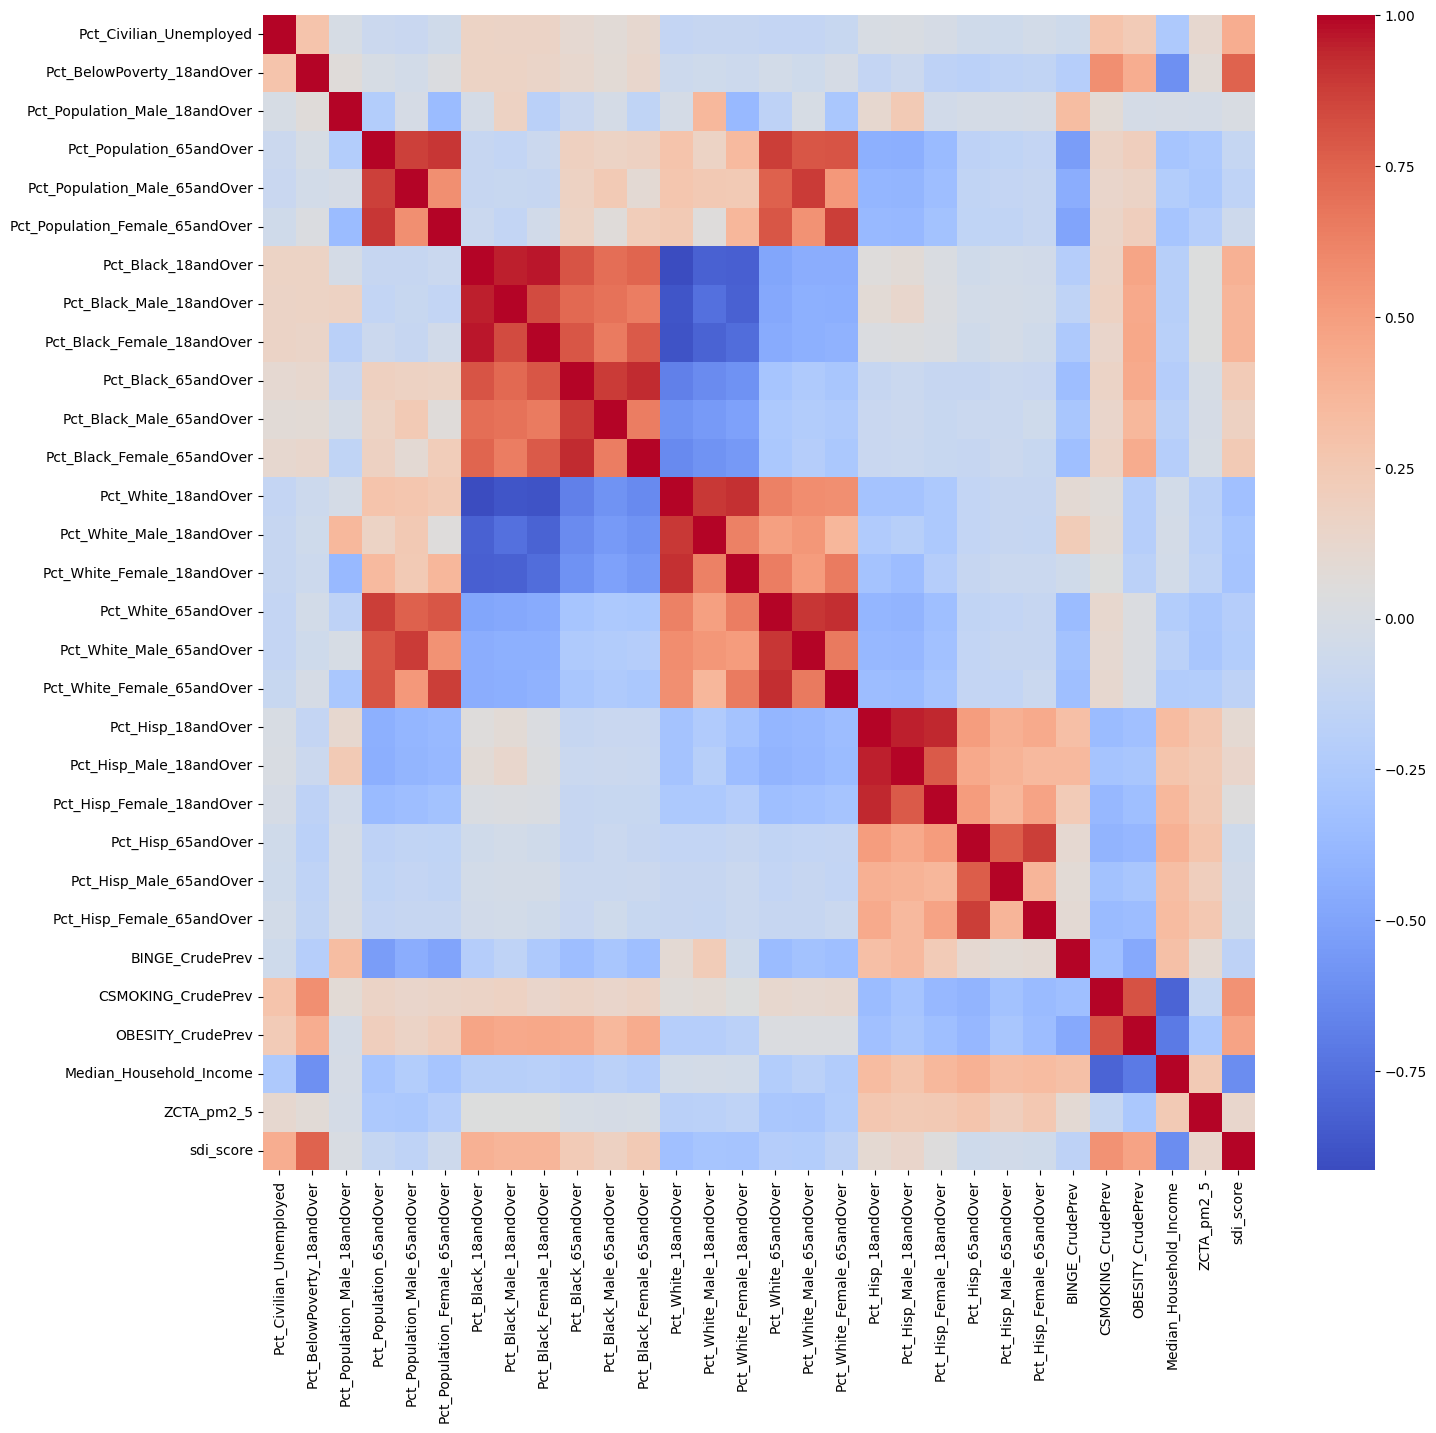

In [817]:


plt.figure(figsize = (16,15))



# Create a heatmap


sns.heatmap(corr_matrix,   cmap = 'coolwarm')



# Show the plot



plt.show()






In [818]:

# Stong pairwise correlation between features (>= 0.75)



corrdata = corr_matrix[corr_matrix>=0.75]



corrdata



,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,Pct_Black_Female_18andOver,Pct_Black_65andOver,...,Pct_Hisp_Female_18andOver,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score
Pct_Civilian_Unemployed,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_BelowPoverty_18andOver,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750921
Pct_Population_Male_18andOver,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_Population_65andOver,NaN,NaN,NaN,1.000000,0.868894,0.902128,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_Population_Male_65andOver,NaN,NaN,NaN,0.868894,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_Population_Female_65andOver,NaN,NaN,NaN,0.902128,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_Black_18andOver,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.951843,0.962904,0.798901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_Black_Male_18andOver,NaN,NaN,NaN,NaN,NaN,NaN,0.951843,1.000000,0.833802,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_Black_Female_18andOver,NaN,NaN,NaN,NaN,NaN,NaN,0.962904,0.833802,1.000000,0.795408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pct_Black_65andOver,NaN,NaN,NaN,NaN,NaN,NaN,0.798901,NaN,0.795408,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [819]:

## Pairwise high pearson correlation coefficient >= 0.75



mask = (corrdata.notna()) & (corrdata != 1)



RowsNames = corrdata.index.tolist()



ColumnNames = corrdata.columns.tolist()




# Extract row-column pairs




pairs = [(RowsNames[row], ColumnNames[col]) for row, col in zip(*np.where(mask))]



# Convert to a DataFrame



HcorrelatedPairs = pd.DataFrame(pairs, columns = ["Feature 1", "Feature 2"])




HcorrelatedPairs.sort_values(by = "Feature 1",  inplace = True)


HcorrelatedPairs


mask = (corrdata.notna()) & (corrdata != 1)



upper_triangle_mask = mask & (np.triu(np.ones(mask.shape), k = 1).astype(bool))



# Get row and column names



RowsNames = corrdata.index.tolist()



ColumnNames = corrdata.columns.tolist()




pairs = [(RowsNames[row], ColumnNames[col]) for row, col in zip(*np.where(upper_triangle_mask))]




HcorrelatedPairs = pd.DataFrame(pairs, columns=["Feature 1", "Feature 2"])





HcorrelatedPairs.sort_values(by = "Feature 1", inplace = False)




HcorrelatedPairs





,Feature 1,Feature 2
0,Pct_BelowPoverty_18andOver,sdi_score
1,Pct_Population_65andOver,Pct_Population_Male_65andOver
2,Pct_Population_65andOver,Pct_Population_Female_65andOver
3,Pct_Population_65andOver,Pct_White_65andOver
4,Pct_Population_65andOver,Pct_White_Male_65andOver
5,Pct_Population_65andOver,Pct_White_Female_65andOver
6,Pct_Population_Male_65andOver,Pct_White_65andOver
7,Pct_Population_Male_65andOver,Pct_White_Male_65andOver
8,Pct_Population_Female_65andOver,Pct_White_65andOver
9,Pct_Population_Female_65andOver,Pct_White_Female_65andOver


In [820]:



np.unique(HcorrelatedPairs["Feature 1"])




array(['CSMOKING_CrudePrev', 'Pct_BelowPoverty_18andOver',
       'Pct_Black_18andOver', 'Pct_Black_65andOver',
       'Pct_Black_Female_18andOver', 'Pct_Black_Male_18andOver',
       'Pct_Hisp_18andOver', 'Pct_Hisp_65andOver',
       'Pct_Hisp_Male_18andOver', 'Pct_Population_65andOver',
       'Pct_Population_Female_65andOver', 'Pct_Population_Male_65andOver',
       'Pct_White_18andOver', 'Pct_White_65andOver'], dtype=object)


## Features

We exclude variables whose information can cover the information from the other variables


Subset variables are considered


It means that, for instance, instead of considering the entire population, we account for differences based on gender



Variables that may be included in the modelling 



* Pct_BelowPoverty_18andOver



* sdi_score



* Pct_White_Male_65andOver



* Pct_White_Female_65andOver



* Pct_Black_Female_65andOver



* Pct_Black_Male_65andOver



* Pct_Hisp_Male_65andOver



* Pct_Hisp_Female_65andOver



* OBESITY_CrudePrev



* CSMOKING_CrudePrev



* Pct_Civilian_Unemployed



* BINGE_CrudePrev



* Median_Household_Income



* ZCTA_pm2_5






## Feature engineering  



* Pct_White_Male_18andUnder65 = Pct_White_Male_18andOver - Pct_White_Male_65andOver



* Pct_White_Female_18andUnder65 = Pct_White_Female_18andOver - Pct_White_Female_65andOver



* Pct_Black_Female_18andUnder65 = Pct_Black_Female_18andOver - Pct_Black_Female_65andOver



* Pct_Black_Male_18andUnder65 = Pct_Black_Male_18andOver - Pct_Black_Male_65andOver



* Pct_Hisp_Male_18andUnder65 = Pct_Hisp_Male_18andOver - Pct_Hisp_Male_65andOver



* Pct_Hisp_Female_18andUnder65 = Pct_Hisp_Female_18andOver - Pct_Hisp_Female_65andOver




In [821]:


xdata.head()



,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_18andOver,Pct_Population_65andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_18andOver,Pct_Black_Male_18andOver,Pct_Black_Female_18andOver,Pct_Black_65andOver,...,Pct_Hisp_Female_18andOver,Pct_Hisp_65andOver,Pct_Hisp_Male_65andOver,Pct_Hisp_Female_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score
0,2.3,1.907688,48.342384,9.024007,4.801372,4.222635,11.138897,5.244356,5.894541,0.685910,...,3.958274,0.371535,0.185767,0.185767,17.1,11.9,22.5,153314.0,7.801598,1.0
1,4.6,12.441946,49.278905,26.766072,13.664141,13.101931,3.299927,1.686629,1.613297,0.562210,...,2.371058,0.000000,0.000000,0.000000,17.7,17.8,32.2,82500.0,7.171176,18.0
2,4.5,9.415209,49.808468,8.959626,3.328926,5.630699,16.742940,7.993491,8.749449,1.247500,...,16.841249,0.918675,0.227126,0.691549,17.4,18.3,36.6,70629.0,7.940322,72.0
3,5.6,7.276174,51.022447,12.299881,5.479870,6.820011,14.608363,8.135179,6.473183,1.459449,...,13.861991,1.048806,0.413418,0.635387,17.8,17.9,31.7,81042.0,8.013779,50.0
4,5.6,8.663903,51.306431,11.569619,5.480546,6.089073,9.629940,5.339824,4.290115,1.361579,...,14.600844,0.981250,0.532461,0.448789,17.3,18.6,33.8,88207.0,8.080360,56.0


In [822]:
xdata.columns


Index(['Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_18andOver', 'Pct_Population_65andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_18andOver', 'Pct_Black_Male_18andOver',
       'Pct_Black_Female_18andOver', 'Pct_Black_65andOver',
       'Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_18andOver', 'Pct_White_Male_18andOver',
       'Pct_White_Female_18andOver', 'Pct_White_65andOver',
       'Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_18andOver', 'Pct_Hisp_Male_18andOver',
       'Pct_Hisp_Female_18andOver', 'Pct_Hisp_65andOver',
       'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score'],
      dtype='object')

In [823]:


datax = xdata.copy()




datax["Pct_White_Male_Between18and65"] = xdata["Pct_White_Male_18andOver"] - xdata["Pct_White_Male_65andOver"]



datax["Pct_White_Female_Between18and65"] = xdata["Pct_White_Female_18andOver"] - xdata["Pct_White_Female_65andOver"]



datax["Pct_Black_Female_Between18and65"] = xdata["Pct_Black_Female_18andOver"] - xdata["Pct_Black_Female_65andOver"]



datax["Pct_Black_Male_Between18and65"] = xdata["Pct_Black_Male_18andOver"] - xdata["Pct_Black_Male_65andOver"]



datax["Pct_Hisp_Male_Between18and65"] = xdata["Pct_Hisp_Male_18andOver"] - xdata["Pct_Hisp_Male_65andOver"]




datax["Pct_Hisp_Female_Between18and65"] = xdata["Pct_Hisp_Female_18andOver"] - xdata["Pct_Hisp_Female_65andOver"]





In [824]:
z = datax>=0


pd.DataFrame({"All are positive":   z.sum()})
    
    

,All are positive
Pct_Civilian_Unemployed,788
Pct_BelowPoverty_18andOver,788
Pct_Population_Male_18andOver,788
Pct_Population_65andOver,788
Pct_Population_Male_65andOver,788
Pct_Population_Female_65andOver,788
Pct_Black_18andOver,788
Pct_Black_Male_18andOver,788
Pct_Black_Female_18andOver,788
Pct_Black_65andOver,788


In [825]:
datax.columns

Index(['Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_18andOver', 'Pct_Population_65andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_18andOver', 'Pct_Black_Male_18andOver',
       'Pct_Black_Female_18andOver', 'Pct_Black_65andOver',
       'Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_18andOver', 'Pct_White_Male_18andOver',
       'Pct_White_Female_18andOver', 'Pct_White_65andOver',
       'Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_18andOver', 'Pct_Hisp_Male_18andOver',
       'Pct_Hisp_Female_18andOver', 'Pct_Hisp_65andOver',
       'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score',
       'Pct_White_Male_Between18and65', 'Pct_White_Female_Between18and65',
       'Pct_Black_Female_Between18and65', 'Pc

In [826]:


## Summary of the features included in the modelling



xcol = ['Pct_Civilian_Unemployed', 'Pct_BelowPoverty_18andOver',
       'Pct_Population_Male_65andOver', 'Pct_Population_Female_65andOver',
       'Pct_Black_65andOver','Pct_Black_Male_65andOver', 'Pct_Black_Female_65andOver',
       'Pct_White_65andOver','Pct_White_Male_65andOver', 'Pct_White_Female_65andOver',
       'Pct_Hisp_65andOver', 'Pct_Hisp_Male_65andOver', 'Pct_Hisp_Female_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score','Pct_White_Male_Between18and65', 
       'Pct_White_Female_Between18and65',
       'Pct_Black_Female_Between18and65', 'Pct_Black_Male_Between18and65',
       'Pct_Hisp_Male_Between18and65', 'Pct_Hisp_Female_Between18and65']



In [827]:


x = datax[xcol]


x


,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
0,2.3,1.907688,4.801372,4.222635,0.685910,0.278651,0.407259,4.779937,2.657902,2.122035,...,22.5,153314.0,7.801598,1.0,24.242641,24.607031,5.487282,4.965704,3.801086,3.772506
1,4.6,12.441946,13.664141,13.101931,0.562210,0.562210,0.000000,25.054999,12.784160,12.270838,...,32.2,82500.0,7.171176,18.0,32.437057,34.685896,1.613297,1.124419,0.024444,2.371058
2,4.5,9.415209,3.328926,5.630699,1.247500,0.420353,0.827147,5.800197,2.108546,3.691651,...,36.6,70629.0,7.940322,72.0,27.329740,25.495780,7.922302,7.573138,17.732805,16.149700
3,5.6,7.276174,5.479870,6.820011,1.459449,0.638162,0.821287,9.725035,4.242391,5.482645,...,31.7,81042.0,8.013779,50.0,29.014178,28.844927,5.651896,7.497017,14.896923,13.226603
4,5.6,8.663903,5.480546,6.089073,1.361579,0.893774,0.467805,8.739969,3.966835,4.773134,...,33.8,88207.0,8.080360,56.0,31.129959,29.057164,3.822310,4.446050,17.616856,14.152056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,5.9,26.901408,11.267606,7.887324,0.000000,0.000000,0.000000,19.154930,11.267606,7.887324,...,35.9,25625.0,8.217162,60.0,43.098592,37.746479,0.000000,0.000000,0.000000,0.000000
892,8.4,20.799660,7.230966,5.869843,0.000000,0.000000,0.000000,13.100808,7.230966,5.869843,...,36.7,41318.0,8.007121,52.0,43.002977,43.130583,0.000000,0.000000,0.765632,0.000000
893,6.7,12.025316,11.329935,15.129750,0.417053,0.185357,0.231696,25.857275,11.144578,14.712697,...,38.7,47820.0,7.577166,54.0,34.291010,32.924004,0.741427,2.988879,0.278035,0.000000
894,2.9,23.047538,13.412564,16.256367,0.000000,0.000000,0.000000,29.668930,13.412564,16.256367,...,36.6,34668.0,8.219753,45.0,39.176570,30.645161,0.000000,0.000000,0.509338,0.000000


In [828]:
x.shape

(788, 25)


## Feature transformation

The aim of the work is to model the lung cancer positive cases using features

It is to discern features that are strongly associated with lung cancer


The columns in the data are very heterogeneous with different scales, possibly very unevenly distributed


To fit the proposed model to the data,  it is necessary to perform feature transformations




In [829]:




Percent2DecimalTransformer = make_pipeline(FunctionTransformer(lambda X: X / 100, validate = True))



StandardScaleTransformer = make_pipeline(StandardScaler())



Feature_preprocessing = ColumnTransformer([
    
    
    
    
        ("PercentToDecimal", Percent2DecimalTransformer, ["Pct_Civilian_Unemployed", 
                            "Pct_BelowPoverty_18andOver",
                            "Pct_Population_Male_65andOver", "Pct_Population_Female_65andOver",
                            "Pct_Black_65andOver","Pct_Black_Male_65andOver", 'Pct_Black_Female_65andOver',
                            "Pct_White_65andOver","Pct_White_Male_65andOver", "Pct_White_Female_65andOver",
                            "Pct_Hisp_65andOver", "Pct_Hisp_Male_65andOver", "Pct_Hisp_Female_65andOver",
                            "Pct_White_Male_Between18and65", "Pct_White_Female_Between18and65",
                            "Pct_Black_Female_Between18and65", "Pct_Black_Male_Between18and65",
                            "Pct_Hisp_Male_Between18and65", "Pct_Hisp_Female_Between18and65"]),
        
    
    
        ("StandardScaleTransformer",StandardScaleTransformer, ["BINGE_CrudePrev", "CSMOKING_CrudePrev", 
                                                       
                                                       "OBESITY_CrudePrev",
                                                       "Median_Household_Income", "ZCTA_pm2_5", "sdi_score"])])





In [830]:
Feature_preprocessing

ColumnTransformer(transformers=[('PercentToDecimal',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x31cd7a200>,
                                                                      validate=True))]),
                                 ['Pct_Civilian_Unemployed',
                                  'Pct_BelowPoverty_18andOver',
                                  'Pct_Population_Male_65andOver',
                                  'Pct_Population_Female_65andOver',
                                  'Pct_Black_65andOver',
                                  'Pct_Black_Male_65andOver',
                                  'Pct_Black_Fe...
                                  'Pct_White_Female_Between18and65',
                                  'Pct_Black_Female_Between18and65',
                                  'Pct_Black_Male_Between18and65',
                                  'Pct_Hisp_Male_Between18and65',
                                  'Pct_Hisp_Female_Between18and65']),
                                ('StandardScaleTransformer',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['BINGE_CrudePrev', 'CSMOKING_CrudePrev',
                                  'OBESITY_CrudePrev',
                                  'Median_Household_Income', 'ZCTA_pm2_5',
                                  'sdi_score'])])

In [831]:
N

0      13996
1       4091
2      29499
3      36041
4      26293
       ...  
891      710
892     2351
893     4316
894     2356
895      268
Name: Population_18andOver, Length: 788, dtype: int64

In [832]:



x_train, x_test, y_train, y_test, N_train, N_test = train_test_split(x, y, N, test_size = 0.3, random_state = 420)




In [833]:
x_train.head()

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
140,8.1,10.945890,9.954564,7.765386,3.634862,3.634862,0.000000,13.052458,5.617513,7.434944,...,36.8,61429.0,7.600453,47.0,38.166047,35.563817,3.634862,2.973978,0.784800,1.982652
779,2.1,5.487995,13.314624,15.060804,0.000000,0.000000,0.000000,28.375429,13.314624,15.060804,...,33.2,69629.0,6.803544,12.0,38.072965,32.616152,0.062364,0.218273,0.093545,0.000000
467,3.7,4.664634,9.146341,10.121951,0.426829,0.000000,0.426829,18.841463,9.146341,9.695122,...,31.7,82471.0,6.668248,9.0,38.902439,35.609756,1.615854,0.792683,0.853659,1.067073
250,4.5,27.673653,5.239207,7.018670,1.899067,0.670945,1.228121,9.839557,4.466161,5.373396,...,26.6,63339.0,7.317931,69.0,31.341890,30.845974,6.324387,5.633022,2.514586,1.481914
46,1.8,8.228571,15.600000,16.342857,3.371429,0.000000,3.371429,27.828571,14.857143,12.971429,...,30.9,84792.0,7.483860,19.0,30.057143,37.028571,0.000000,0.000000,6.057143,4.971429


In [834]:
x_test.head()

,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
578,1.8,11.188463,20.537046,18.050721,4.574838,2.337146,2.237693,33.764296,18.199901,15.564396,...,36.7,52179.0,7.982785,26.0,22.774739,28.194928,4.127300,5.469915,0.447539,0.000000
316,0.0,14.055944,15.734266,16.503497,8.741259,6.153846,2.587413,23.496503,9.580420,13.916084,...,35.4,59882.0,7.552918,31.0,28.321678,30.069930,3.636364,5.734266,0.000000,0.000000
650,6.0,11.449659,16.748675,14.629069,0.529902,0.529902,0.000000,29.712339,16.218774,13.493565,...,34.7,66000.0,7.617609,26.0,32.172597,33.535201,1.324754,0.794852,0.000000,0.000000
409,3.9,14.330844,13.181944,15.120465,7.920244,2.935475,4.984769,20.022155,10.135696,9.886458,...,42.3,41611.0,6.765537,67.0,22.846857,26.613127,10.108003,10.301855,4.403212,3.904736
621,10.8,19.202419,13.785701,15.083069,2.706739,1.493373,1.213366,26.068695,12.292328,13.776367,...,37.3,33788.0,7.696925,70.0,28.290088,30.679485,4.741460,3.490760,1.717379,1.876050


In [835]:
y_train.head()

140    10.0
779    23.0
467    19.0
250    93.0
46      3.0
Name: case_n_18plus, dtype: float64

In [836]:
y_test.head()

578    25.0
316    17.0
650    34.0
409    25.0
621    74.0
Name: case_n_18plus, dtype: float64

In [837]:
N_train.head()

140     2421
779     3207
467     3280
250    34280
46      1750
Name: Population_18andOver, dtype: int64

In [838]:
N_test.head()

578     2011
316     1430
650     5284
409     3611
621    10714
Name: Population_18andOver, dtype: int64

In [839]:


print("Train data")


print(y_train.shape)


print(x_train.shape)


print(N_train.shape)



print("Test data")


print(y_test.shape)


print(x_test.shape)


print(N_test.shape)




Train data
(551,)
(551, 25)
(551,)
Test data
(237,)
(237, 25)
(237,)




## Poisson GLM with regularization





We model count data $Y_{i}$ under the assumption:

\begin{align}
\mathbb{E}[Y_{i}] = A_{i} \lambda_{i},
\end{align}
where

\begin{align}
\lambda_i = \exp(\mathbf{x}_{i}^\top \boldsymbol{\beta})
\end{align}


Here, $A_{i}$ denotes the size of the area, while $\lambda_{i}$ is the intensity of events occurring within that area


In our case, $A_{i} = N_{i}$ represents the total population size, and $\lambda_i$ denotes the incidence rate of lung cancer per person in that population



The Poisson probability mass function is:


\begin{align}
P(Y_{i} = y_{i}) = \frac{(N_{i} \lambda_{i})^{y_{i}} e^{-N_{i} \lambda_{i}}}{y_{i}!}
= \frac{\left(N_{i} e^{\mathbf{x}_{i}^\top \boldsymbol{\beta}} \right)^{y_{i}} e^{-A_{i} e^{\mathbf{x}_{i}^\top \boldsymbol{\beta}}}}{y_{i}!}
\end{align}



Taking the log-likelihood over $n$ observations:


\begin{align}
\ell(\boldsymbol{\beta}) = \sum_{i=1}^n \left[
y_{i} \log N_{i} + y_{i} \mathbf{x}_{i}^\top \boldsymbol{\beta}
- N_{i} e^{\mathbf{x}_{i}^\top \boldsymbol{\beta}} - \log(y_{i}!)
\right]
\end{align}



## Regularization


Let $\alpha \ge 0$ and $\gamma \ge 0$.



$L_{2}$ penalty (Ridge regression)


\begin{align}
Penalty = \frac{\alpha}{2} \|\boldsymbol{\beta}\|_2^2
\end{align}
  
$L_{1}$ penalty (Lasso regression)

\begin{align}
Penalty = \alpha \|\boldsymbol{\beta}\|_1
\end{align}
  
$L_{1}$ plus $L_{2}$ penalty (Elastic Net Penalty)


\begin{align}
Penalty = \alpha \left[ \gamma \|\boldsymbol{\beta}\|_1 + \frac{1 - \gamma}{2} \|\boldsymbol{\beta}\|_2^2 \right]
\end{align}


## Objective Function

The regularized loss function to minimize is:

\begin{align}
\mathcal{L}(\boldsymbol\beta) = - \ell(\boldsymbol\beta) + \text{Penalty}
\end{align}

Using Elastic Net Penalty regularization:

\begin{align}
\mathcal{L}(\boldsymbol{\beta}) = - \sum_{i=1}^n \left[y_{i} \log N_{i} + y_{i} \mathbf{x}_{i}^\top \boldsymbol{\beta} - N_{i} e^{\mathbf{x}_{i}^\top \boldsymbol{\beta}} - \log(y_{i}!) \right] + \alpha \left[ \gamma \|\boldsymbol{\beta}\|_1 + \frac{1 - \gamma}{2} \|\boldsymbol{\beta}\|_2^2 \right]
\end{align}





In [840]:



xtrain = x_train.copy(deep = True)



xtest = x_test.copy(deep = True)



# Manually apply Percent2DecimalTransformer



percent_columns = ["Pct_Civilian_Unemployed", "Pct_BelowPoverty_18andOver",
    
    
    "Pct_Population_Male_65andOver", "Pct_Population_Female_65andOver",
                   
                   
    "Pct_Black_65andOver", "Pct_Black_Male_65andOver", "Pct_Black_Female_65andOver",
                   
                   
                   
    "Pct_White_65andOver", "Pct_White_Male_65andOver", "Pct_White_Female_65andOver",
                   
                   
                   
    "Pct_Hisp_65andOver", "Pct_Hisp_Male_65andOver", "Pct_Hisp_Female_65andOver",
                   
                   
    "Pct_White_Male_Between18and65", "Pct_White_Female_Between18and65",
                   
                   
                   
    "Pct_Black_Female_Between18and65", "Pct_Black_Male_Between18and65",
                   
                   
                   
    "Pct_Hisp_Male_Between18and65", "Pct_Hisp_Female_Between18and65"
                   
                   
]


xtrain[percent_columns] = xtrain[percent_columns] / 100





# Manually apply StandardScaleTransformer



scale_columns = ["BINGE_CrudePrev", 
                 
                 
                 "CSMOKING_CrudePrev", 
                 
                 
                 
                 "OBESITY_CrudePrev",
                 
                 
                 
                 "Median_Household_Income", 
                 
                 
                 
                 "ZCTA_pm2_5", 
                 
                 
                 
                 "sdi_score"]



scaler = StandardScaler()



# Fit and transform the training data


xtrain[scale_columns] = scaler.fit_transform(xtrain[scale_columns])



# Apply the same transformation to the test data (using the learned parameters)


xtest[scale_columns] = scaler.transform(xtest[scale_columns])




xtest[percent_columns] = xtest[percent_columns] / 100




Best Alpha: 0.1
Best Mae: 7.465142237108999
Average Coefficients for Best Alpha: [-4.88366902  0.         -0.22554026  0.          0.          0.
  0.          0.          0.21111524  0.          0.01064067  0.
  0.          0.         -0.06409886  0.15411963  0.02376056 -0.24275195
 -0.09251843 -0.12740059 -0.63680297 -0.28207658 -0.2214787  -0.55915735
 -0.68937374 -0.57675277]


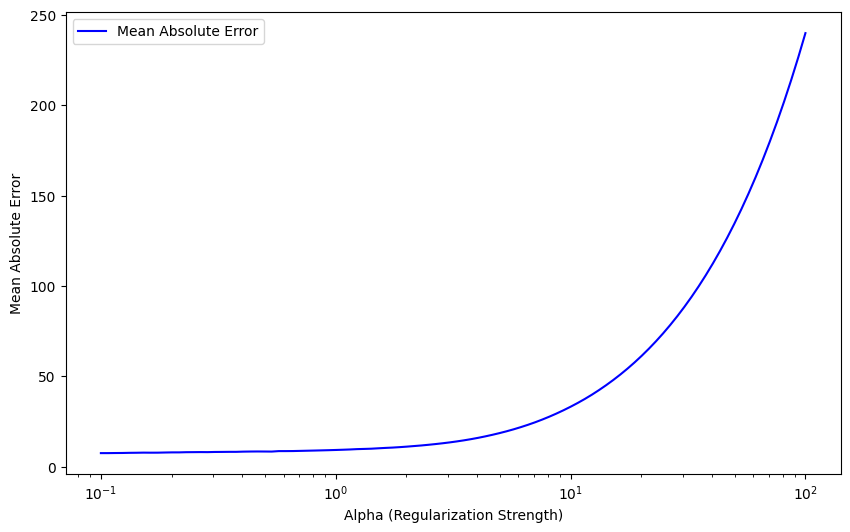

In [844]:


# Regularization settings (L1_wt = 1 for Lasso, 0 < L1_wt < 1 for Elastic net, alpha varies)



# l1_ratio = 1  # Pure Lasso



l1_ratio = 0.25  # Elastic net



# Generate a range of alpha values for the regularization

    

alpha_values = np.logspace(-1, 2, 100)



# K-Fold Cross-Validation



kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)



# Store results



coefficients = []



mae_scores = []



# Loop through different alpha values

    
for alpha in alpha_values:
    
    
    fold_mae_scores = []
    
    
    fold_coefficients = []
    
    
    
    for fold, (train_index, val_index) in enumerate(kfold.split(xtrain), 1):
        
        
        
        trainx, valx = xtrain.iloc[train_index], xtrain.iloc[val_index]
        
        
        
        trainy, valy = y_train.iloc[train_index], y_train.iloc[val_index]
        
        
        
        trainN, valN = N_train.iloc[train_index], N_train.iloc[val_index]
        

        # Fit Poisson GLM with regularization and offset
        
        
        
        glm_poisson = sm.GLM(trainy, sm.add_constant(trainx),
                             
                             
                             family = sm.families.Poisson(),
                             
                             
                             offset = np.log(trainN))

        
        
        result = glm_poisson.fit_regularized(method = 'elastic_net',
                                             
                                             
                                             alpha = alpha,
                                             
                                             
                                             
                                              maxiter = 1000,
                                             
                                             
                                             
                                             L1_wt = l1_ratio)  
        
        # Coefficients
        
        
        coef = result.params
        
        
        fold_coefficients.append(coef)
        
        

        # Predict on validation set
        
        
        predy = result.predict(sm.add_constant(valx), offset = np.log(valN))
        
            
        

        # Calculate MAE
        
        
        mae = np.mean(np.abs(valy - predy))
        
        
        fold_mae_scores.append(mae)
        
        

    # Average Mae for this alpha
    
    
    
    mae_scores.append(np.mean(fold_mae_scores))
    
    

    coefficients.append(np.mean(fold_coefficients, axis=0))
    
    

# Find the alpha with the lowest average Mae


best_alpha_idx = np.argmin(mae_scores)



best_alpha = alpha_values[best_alpha_idx]



best_mae = mae_scores[best_alpha_idx]




print("\nBest Alpha:", best_alpha)



print("Best Mae:", best_mae)



# Average Coefficients for best alpha



best_coefficients = coefficients[best_alpha_idx]



print("Average Coefficients for Best Alpha:", best_coefficients)



# Plot mean absolute value of coefficients against alpha



plt.figure(figsize = (10, 6))



plt.plot(alpha_values,   mae_scores, label = 'Mean Absolute Error', color = 'blue')



plt.xscale('log')



plt.xlabel('Alpha (Regularization Strength)')



plt.ylabel('Mean Absolute Error')



plt.grid(False)



plt.legend()



plt.show()





Next, we fit the model to the training data using the selected hyperparameter $\alpha = 0.1$ and the hand-picked elastic net parameter, $\gamma = 0.25$


In [677]:


glm_poisson = sm.GLM(y_train, sm.add_constant(xtrain),
                             
                             
                             family = sm.families.Poisson(),
                             
                             
                             offset = np.log(N_train))

        
        
result = glm_poisson.fit_regularized(method = 'elastic_net',
                                             
                                             
                                             alpha = 0.1,
                                             
                                             
                                             
                                              maxiter = 1000,
                                             
                                             
                                     
                                              opt_method = 'str'
                                     
                                     
                                             
                                             L1_wt = 0.25)  
        
        
coef = result.params 



coef
     
    
    

const                             -4.897716
Pct_Civilian_Unemployed            0.000000
Pct_BelowPoverty_18andOver        -0.407683
Pct_Population_Male_65andOver      0.000000
Pct_Population_Female_65andOver    0.000000
Pct_Black_65andOver                0.000000
Pct_Black_Male_65andOver           0.000000
Pct_Black_Female_65andOver         0.000000
Pct_White_65andOver                0.279259
Pct_White_Male_65andOver           0.000000
Pct_White_Female_65andOver         0.000000
Pct_Hisp_65andOver                 0.000000
Pct_Hisp_Male_65andOver            0.000000
Pct_Hisp_Female_65andOver          0.000000
BINGE_CrudePrev                   -0.073376
CSMOKING_CrudePrev                 0.133666
OBESITY_CrudePrev                  0.045691
Median_Household_Income           -0.237300
ZCTA_pm2_5                        -0.091472
sdi_score                         -0.113105
Pct_White_Male_Between18and65     -0.574304
Pct_White_Female_Between18and65   -0.251865
Pct_Black_Female_Between18and65 

In [678]:


# Predict on validation set
   
    
        
predy = result.predict(sm.add_constant(xtest), offset = np.log(N_test))
        
            
        

# Calculate MAE
        
  
        
mae = np.mean(np.abs(y_test - predy))
        

    
mae
    
    

np.float64(7.1877836183763755)

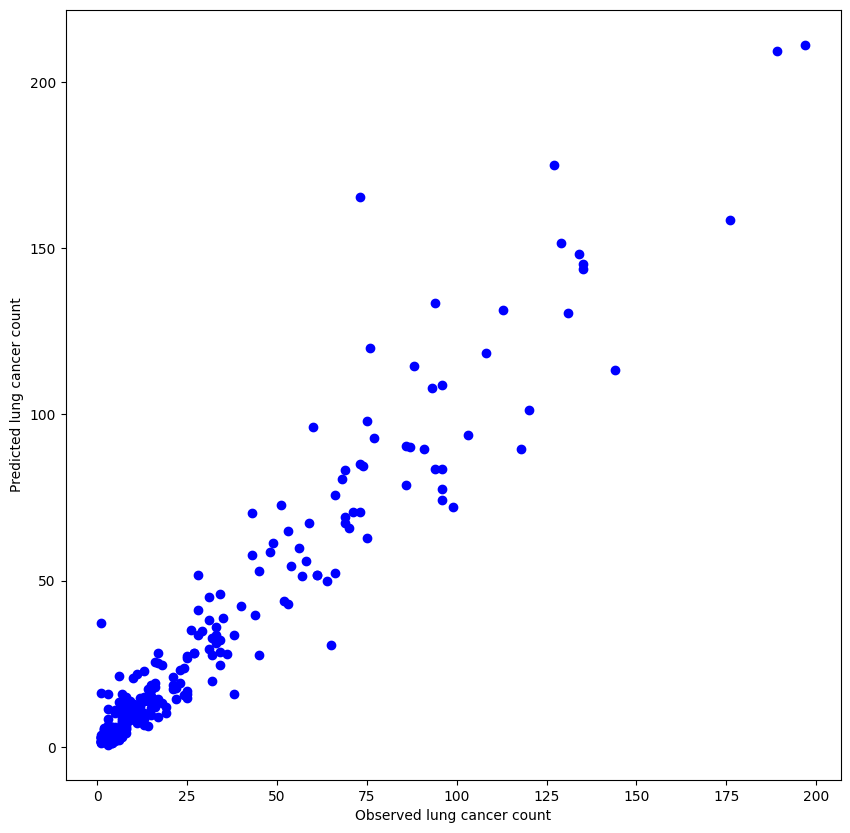

In [713]:



plt.figure(figsize = (10, 10))



plt.scatter(y_test,   predy,  color = 'blue')



plt.xlabel('Observed lung cancer count')



plt.ylabel('Predicted lung cancer count')



plt.grid(False)



plt.show()






Next, we exclude the features with zero estimated coefficients to further investigate the incidence rate of lung cancer



In [679]:


non_zero_coef = coef[coef != 0]


non_zero_coef



const                             -4.897716
Pct_BelowPoverty_18andOver        -0.407683
Pct_White_65andOver                0.279259
BINGE_CrudePrev                   -0.073376
CSMOKING_CrudePrev                 0.133666
OBESITY_CrudePrev                  0.045691
Median_Household_Income           -0.237300
ZCTA_pm2_5                        -0.091472
sdi_score                         -0.113105
Pct_White_Male_Between18and65     -0.574304
Pct_White_Female_Between18and65   -0.251865
Pct_Black_Female_Between18and65   -0.256949
Pct_Black_Male_Between18and65     -0.568462
Pct_Hisp_Male_Between18and65      -0.704949
Pct_Hisp_Female_Between18and65    -0.595175
dtype: float64

In [680]:


non_zero_features = non_zero_coef.index



new_features  =  non_zero_features[1:]




colnames = np.array(pd.Series(new_features))



colnames




array(['Pct_BelowPoverty_18andOver', 'Pct_White_65andOver',
       'BINGE_CrudePrev', 'CSMOKING_CrudePrev', 'OBESITY_CrudePrev',
       'Median_Household_Income', 'ZCTA_pm2_5', 'sdi_score',
       'Pct_White_Male_Between18and65', 'Pct_White_Female_Between18and65',
       'Pct_Black_Female_Between18and65', 'Pct_Black_Male_Between18and65',
       'Pct_Hisp_Male_Between18and65', 'Pct_Hisp_Female_Between18and65'],
      dtype=object)

In [681]:



xtrainx = x_train.copy(deep = True)



xtestx = x_test.copy(deep = True)



xtestx




,Pct_Civilian_Unemployed,Pct_BelowPoverty_18andOver,Pct_Population_Male_65andOver,Pct_Population_Female_65andOver,Pct_Black_65andOver,Pct_Black_Male_65andOver,Pct_Black_Female_65andOver,Pct_White_65andOver,Pct_White_Male_65andOver,Pct_White_Female_65andOver,...,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
578,1.8,11.188463,20.537046,18.050721,4.574838,2.337146,2.237693,33.764296,18.199901,15.564396,...,36.7,52179.0,7.982785,26.0,22.774739,28.194928,4.127300,5.469915,0.447539,0.000000
316,0.0,14.055944,15.734266,16.503497,8.741259,6.153846,2.587413,23.496503,9.580420,13.916084,...,35.4,59882.0,7.552918,31.0,28.321678,30.069930,3.636364,5.734266,0.000000,0.000000
650,6.0,11.449659,16.748675,14.629069,0.529902,0.529902,0.000000,29.712339,16.218774,13.493565,...,34.7,66000.0,7.617609,26.0,32.172597,33.535201,1.324754,0.794852,0.000000,0.000000
409,3.9,14.330844,13.181944,15.120465,7.920244,2.935475,4.984769,20.022155,10.135696,9.886458,...,42.3,41611.0,6.765537,67.0,22.846857,26.613127,10.108003,10.301855,4.403212,3.904736
621,10.8,19.202419,13.785701,15.083069,2.706739,1.493373,1.213366,26.068695,12.292328,13.776367,...,37.3,33788.0,7.696925,70.0,28.290088,30.679485,4.741460,3.490760,1.717379,1.876050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,2.3,16.524217,11.644658,21.728691,15.606242,6.242497,9.363745,17.166867,5.162065,12.004802,...,42.9,41838.0,6.810487,60.0,23.169268,19.327731,12.725090,10.204082,8.523409,0.600240
15,3.9,2.133624,7.758159,9.562027,0.879003,0.450967,0.428036,16.204235,7.161966,9.042269,...,25.1,138687.0,7.782189,3.0,36.841703,35.817473,2.698158,2.224260,3.844684,2.973324
632,3.6,8.533189,9.365223,11.555245,1.280257,0.551622,0.728635,19.265602,8.438992,10.826610,...,31.0,58913.0,7.486481,32.0,37.160382,35.213239,1.226741,2.861024,0.946814,1.152643
4,5.6,8.663903,5.480546,6.089073,1.361579,0.893774,0.467805,8.739969,3.966835,4.773134,...,33.8,88207.0,8.080360,56.0,31.129959,29.057164,3.822310,4.446050,17.616856,14.152056


In [682]:


xtrain_selected = xtrainx[colnames]



xtest_selected = xtestx[colnames]



In [683]:


xtrain_selected.head()



xtest_selected.head()




,Pct_BelowPoverty_18andOver,Pct_White_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
578,11.188463,33.764296,12.3,20.8,36.7,52179.0,7.982785,26.0,22.774739,28.194928,4.127300,5.469915,0.447539,0.000000
316,14.055944,23.496503,16.7,20.4,35.4,59882.0,7.552918,31.0,28.321678,30.069930,3.636364,5.734266,0.000000,0.000000
650,11.449659,29.712339,16.5,20.1,34.7,66000.0,7.617609,26.0,32.172597,33.535201,1.324754,0.794852,0.000000,0.000000
409,14.330844,20.022155,13.8,19.3,42.3,41611.0,6.765537,67.0,22.846857,26.613127,10.108003,10.301855,4.403212,3.904736
621,19.202419,26.068695,14.1,26.0,37.3,33788.0,7.696925,70.0,28.290088,30.679485,4.741460,3.490760,1.717379,1.876050



## XGBoost Poisson Regression: Mathematical formulation


Let $Y_{i}$ denote the observed count over region $A_{i}$ with rate $\lambda_{i}$. In our case, $A_{i} = N_{i}$ refers to the total population (or Population aged 18 and over)


We assume:

\begin{align}
 Y_{i} \sim Poisson(N_{i}\lambda_{i})
\end{align}


The Poisson probability mass function is given by:
\begin{align}
 P(Y_{i} = y_{i}) = \frac{e^{-N_{i}\lambda_{i}} (N_{i}\lambda_{i})^{y_{i}}}{y_{i}!}
\end{align}
We model the rate $\lambda_{i}$ using tree at $t$-th  iteration:

\begin{align}
\log(\lambda_{i}) = f(\mathbf{x}_{i}, \beta_{t})
\end{align}

Let $\mathbf{x} = (\mathbf{x}_{1}, \mathbf{x}_{2}, \cdots,  \mathbf{x}_{n})',\; $ $\mathbf{y} = (y_{1}, y_{2}, \cdots,  y_{n})',\;$ \; $\boldsymbol\lambda = (\lambda_{1}, \lambda_{2}, \cdots,  \lambda_{n})$'

 
The log-likelihood function for the $n$ observations is:

\begin{align}
\ell(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}) = \sum_{i = 1}^{n}{(y_{i} \log(A_{i}\lambda_{i}) -  A_{i}\lambda_{i} - \log(y_{i}!))}
\end{align}


Substituting $\lambda_{i} = e^{f(\mathbf{x}_{i}, \;\beta_{t})}$ and ignoring constants, we have:
\begin{align}
\ell(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t}) &= \sum_{i = 1}^{n}{(y_{i} \log(A_{i}\lambda_{i}) -  A_{i}\lambda_{i} - \log(y_{i}!))}\\
&\approx \sum_{i = 1}^{n}{(y_{i} \log(A_{i}\lambda_{i}) -  A_{i}\lambda_{i} - \log(y_{i}!))}\\
&\approx \sum_{i = 1}^{n}{(y_{i} f(\mathbf{x}_{i},\; \beta_{t}) -  A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}})
\end{align}

In XGBoost Poisson Loss function, we minimize the objective function given by 

\begin{align}
L(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t}) = -\ell(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t})
\end{align}
That is,

\begin{align}
L(\boldsymbol\lambda\mid \mathbf{y}, \mathbf{x}, \beta_{t}) =  \sum_{i = 1}^{n}{(A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}}- y_{i} f(\mathbf{x}_{i},\; \beta_{t}))
\end{align}

Next, we derive gradients:

Gradient: 

\begin{align}
\frac{dL}{df(\mathbf{x}_{i},\; \beta_{t})} = \sum_{i = 1}^{n}{(A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}}- y_{i})
\end{align}


Hessian: 

\begin{align}
\frac{d^{2}L}{df(\mathbf{x}_{i},\; \beta_{t})^{2}} = \sum_{i = 1}^{n}{A_{i}e^{f(\mathbf{x}_{i}, \;\beta_{t})}}
\end{align}


These are used in XGBoost’s custom objective function for efficient optimization




## Poisson Deviance

 
The deviance compares the fitted model to the saturated model  

\begin{align}
D = 2 (\ell(\text{saturated}) - \ell(\hat{\lambda}))
\end{align}


* Log-Likelihood of the Fitted Model


\begin{align}
\ell(\hat{\lambda}) = \sum_{i=1}^{n} \left(y_i \log(A_i \hat{\lambda_i}) - A_i \hat{\lambda_i} - \log(y_i!) \right)
\end{align}

* Log-Likelihood of the Saturated Model


\begin{align}
\ell(\text{saturated}) = \sum_{i=1}^{n} \left( y_i \log(y_i) - y_i - \log(y_i!) \right)
\end{align}

* Deviance Calculation: substitute the log-likelihoods into the deviance expression:
\begin{align}
D = 2 \sum_{i=1}^{n} \left( y_i \log\left(\frac{y_i}{A_i \hat{\lambda_i}}\right) - (y_i - A_i \hat{\lambda_i}) \right)
\end{align}

*  Final Poisson Deviance Formula Using $ A_{i} \lambda_i$  

\begin{align}
D = 2 \sum_{i=1}^{n} \left( y_i \log\left(\frac{y_i}{A_i \hat{\lambda_i}}\right) - (y_i - A_i \hat{\lambda_i}) \right)
\end{align}

* Interpretation  


This formulation penalizes deviations from observed values based on the predicted rate per area or population unit


It effectively handles cases where rates vary by region or population.




In [684]:


selected_xtrain = xtrain_selected.copy(deep = True)




selected_xtest = xtest_selected.copy(deep = True)



In [685]:


selected_xtrain.head()



,Pct_BelowPoverty_18andOver,Pct_White_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
140,10.945890,13.052458,17.5,24.1,36.8,61429.0,7.600453,47.0,38.166047,35.563817,3.634862,2.973978,0.784800,1.982652
779,5.487995,28.375429,15.7,18.3,33.2,69629.0,6.803544,12.0,38.072965,32.616152,0.062364,0.218273,0.093545,0.000000
467,4.664634,18.841463,19.2,19.7,31.7,82471.0,6.668248,9.0,38.902439,35.609756,1.615854,0.792683,0.853659,1.067073
250,27.673653,9.839557,19.1,16.6,26.6,63339.0,7.317931,69.0,31.341890,30.845974,6.324387,5.633022,2.514586,1.481914
46,8.228571,27.828571,15.7,15.7,30.9,84792.0,7.483860,19.0,30.057143,37.028571,0.000000,0.000000,6.057143,4.971429


In [686]:


selected_xtest.head()



,Pct_BelowPoverty_18andOver,Pct_White_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
578,11.188463,33.764296,12.3,20.8,36.7,52179.0,7.982785,26.0,22.774739,28.194928,4.127300,5.469915,0.447539,0.000000
316,14.055944,23.496503,16.7,20.4,35.4,59882.0,7.552918,31.0,28.321678,30.069930,3.636364,5.734266,0.000000,0.000000
650,11.449659,29.712339,16.5,20.1,34.7,66000.0,7.617609,26.0,32.172597,33.535201,1.324754,0.794852,0.000000,0.000000
409,14.330844,20.022155,13.8,19.3,42.3,41611.0,6.765537,67.0,22.846857,26.613127,10.108003,10.301855,4.403212,3.904736
621,19.202419,26.068695,14.1,26.0,37.3,33788.0,7.696925,70.0,28.290088,30.679485,4.741460,3.490760,1.717379,1.876050


In [687]:


columnsnew = selected_xtrain.columns.tolist()


columnsnew 



['Pct_BelowPoverty_18andOver',
 'Pct_White_65andOver',
 'BINGE_CrudePrev',
 'CSMOKING_CrudePrev',
 'OBESITY_CrudePrev',
 'Median_Household_Income',
 'ZCTA_pm2_5',
 'sdi_score',
 'Pct_White_Male_Between18and65',
 'Pct_White_Female_Between18and65',
 'Pct_Black_Female_Between18and65',
 'Pct_Black_Male_Between18and65',
 'Pct_Hisp_Male_Between18and65',
 'Pct_Hisp_Female_Between18and65']

In [688]:



columnnamesa = ["Pct_Civilian_Unemployed", 
                            "Pct_BelowPoverty_18andOver",
                            "Pct_Population_Male_65andOver", "Pct_Population_Female_65andOver",
                            "Pct_Black_65andOver","Pct_Black_Male_65andOver", 'Pct_Black_Female_65andOver',
                            "Pct_White_65andOver","Pct_White_Male_65andOver", "Pct_White_Female_65andOver",
                            "Pct_Hisp_65andOver", "Pct_Hisp_Male_65andOver", "Pct_Hisp_Female_65andOver",
                            "Pct_White_Male_Between18and65", "Pct_White_Female_Between18and65",
                            "Pct_Black_Female_Between18and65", "Pct_Black_Male_Between18and65",
                            "Pct_Hisp_Male_Between18and65", "Pct_Hisp_Female_Between18and65"]



columnnamesb =  ["BINGE_CrudePrev", "CSMOKING_CrudePrev", 
                                                       
                             "OBESITY_CrudePrev",
                             "Median_Household_Income", "ZCTA_pm2_5", "sdi_score"]


In [689]:





selected_columnsa = pd.Series(columnnamesa)[pd.Series(columnnamesa).isin(columnsnew)].tolist()





selected_columnsb = pd.Series(columnnamesb)[pd.Series(columnnamesb).isin(columnsnew)].tolist()






In [690]:


selected_columnsa



['Pct_BelowPoverty_18andOver',
 'Pct_White_65andOver',
 'Pct_White_Male_Between18and65',
 'Pct_White_Female_Between18and65',
 'Pct_Black_Female_Between18and65',
 'Pct_Black_Male_Between18and65',
 'Pct_Hisp_Male_Between18and65',
 'Pct_Hisp_Female_Between18and65']

In [691]:


selected_columnsb



['BINGE_CrudePrev',
 'CSMOKING_CrudePrev',
 'OBESITY_CrudePrev',
 'Median_Household_Income',
 'ZCTA_pm2_5',
 'sdi_score']

In [692]:


Percent2DecimalTransformer = make_pipeline(FunctionTransformer(lambda X: X / 100, validate = True))



StandardScaleTransformer = make_pipeline(StandardScaler())



Feature_preprocessing = ColumnTransformer([
    
    
    
    
        ("PercentToDecimal", Percent2DecimalTransformer, selected_columns),
        
    
    
        ("StandardScaleTransformer",StandardScaleTransformer, selected_columnsb)])




In [693]:


# Scalling manually



selected_xtrain[selected_columnsa] = selected_xtrain[selected_columnsa] / 100




selected_xtest[selected_columnsa] = selected_xtest[selected_columnsa] / 100




scaler = StandardScaler()




# Fit and transform the training data



selected_xtrain[selected_columnsb] = scaler.fit_transform(selected_xtrain[selected_columnsb])




# Apply the same transformation to the test data (using the learned parameters)




selected_xtest[selected_columnsb] = scaler.transform(selected_xtest[selected_columnsb])





In [694]:


selected_xtrain.head()



,Pct_BelowPoverty_18andOver,Pct_White_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
140,0.109459,0.130525,0.815147,0.973795,0.536559,-0.096117,-0.021411,0.287624,0.381660,0.355638,0.036349,0.029740,0.007848,0.019827
779,0.054880,0.283754,-0.034346,-0.378743,-0.181072,0.169842,-1.713352,-1.174760,0.380730,0.326162,0.000624,0.002183,0.000935,0.000000
467,0.046646,0.188415,1.617445,-0.052268,-0.480085,0.586360,-2.000604,-1.300107,0.389024,0.356098,0.016159,0.007927,0.008537,0.010671
250,0.276737,0.098396,1.570251,-0.775177,-1.496730,-0.034168,-0.621242,1.206836,0.313419,0.308460,0.063244,0.056330,0.025146,0.014819
46,0.082286,0.278286,-0.034346,-0.985053,-0.639559,0.661640,-0.268954,-0.882283,0.300571,0.370286,0.000000,0.000000,0.060571,0.049714


In [695]:

selected_xtest.head()


,Pct_BelowPoverty_18andOver,Pct_White_65andOver,BINGE_CrudePrev,CSMOKING_CrudePrev,OBESITY_CrudePrev,Median_Household_Income,ZCTA_pm2_5,sdi_score,Pct_White_Male_Between18and65,Pct_White_Female_Between18and65,Pct_Black_Female_Between18and65,Pct_Black_Male_Between18and65,Pct_Hisp_Male_Between18and65,Pct_Hisp_Female_Between18and65
578,0.111885,0.337643,-1.638944,0.204248,0.516625,-0.396132,0.790328,-0.589806,0.227747,0.281949,0.041273,0.054699,0.004475,0.000000
316,0.140559,0.234965,0.437594,0.110969,0.257480,-0.146293,-0.122334,-0.380895,0.283217,0.300699,0.036364,0.057343,0.000000,0.000000
650,0.114497,0.297123,0.343206,0.041010,0.117941,0.052139,0.015012,-0.589806,0.321726,0.335352,0.013248,0.007949,0.000000,0.000000
409,0.143308,0.200222,-0.931033,-0.145547,1.632941,-0.738895,-1.794047,1.123271,0.228469,0.266131,0.101080,0.103019,0.044032,0.039047
621,0.192024,0.260687,-0.789451,1.416868,0.636230,-0.992627,0.183412,1.248618,0.282901,0.306795,0.047415,0.034908,0.017174,0.018761


In [696]:

X = selected_xtrain



ytrain = y_train



weight = N_train



In [697]:


dtrain = xgb.DMatrix(X, label = ytrain, weight = weight)



print(dtrain.num_row())



print(dtrain.num_col())



551
14


In [698]:


X = selected_xtest




dtest = xgb.DMatrix(X, label = y_test, weight = N_test)



In [709]:


ytrain = ytrain



X = selected_xtrain



weight = N_train



# Custom objective for Poisson regression



# Ensures the model optimizes for Poisson regression



def poisson_objective(preds, dtrain):
    

    
    y_true = dtrain.get_label()
    
    
    N_i = dtrain.get_float_info('weight')  
    
    
    preds = np.exp(preds)
    
    
    grad = N_i * preds - y_true
    
    
    hess = N_i * preds
    
    
    return grad, hess



#  checks performance using the Poisson deviance


def poisson_deviance(preds, dtrain):
    
    
    y_true = dtrain.get_label()
    
    
    N_i = dtrain.get_float_info('weight')  
    
    
    preds = np.exp(preds)
    
    
    deviance = 2 * np.sum(y_true * np.log((y_true) / (preds* N_i)) - (y_true - preds* N_i))
    
    
    return 'poisson_deviance', deviance




dtrain = xgb.DMatrix(X, label = ytrain, weight = weight)


params = {

    'max_depth': 6,
}



model = xgb.train(
    
    
    params,
    

    
    dtrain,
    
    
    
    num_boost_round = 150,
    
    
    
    obj = poisson_objective,
    
    
    
    custom_metric = poisson_deviance)



preds = model.predict(dtest)



poisson_preds = N_test*np.exp(preds)




mae = np.mean(abs(y_test - poisson_preds))



print(f"MAE: {mae}")



MAE: 6.4559010126159375


In [703]:
poisson_preds

578     10.594951
316     12.633728
650     46.139427
409     33.326261
621     58.465468
          ...    
438      8.944966
15      37.348201
632    138.849107
4       78.276387
687    127.205206
Name: Population_18andOver, Length: 237, dtype: float64

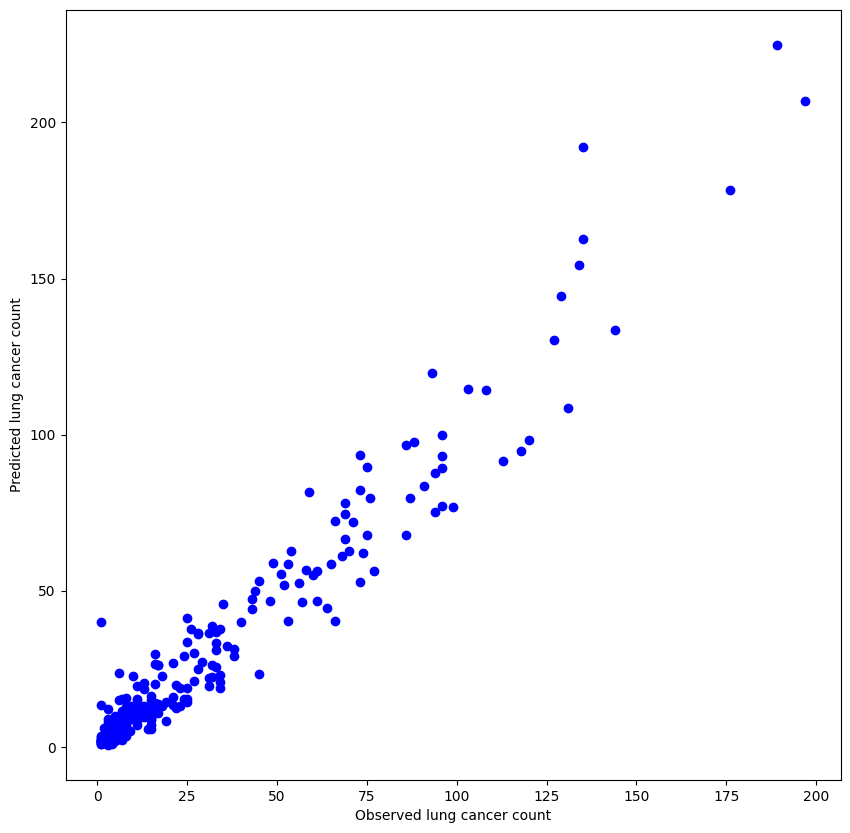

In [715]:


plt.figure(figsize = (10, 10))



plt.scatter(y_test,   poisson_preds,  color = 'blue')



plt.xlabel('Observed lung cancer count')



plt.ylabel('Predicted lung cancer count')



plt.grid(False)



plt.show()




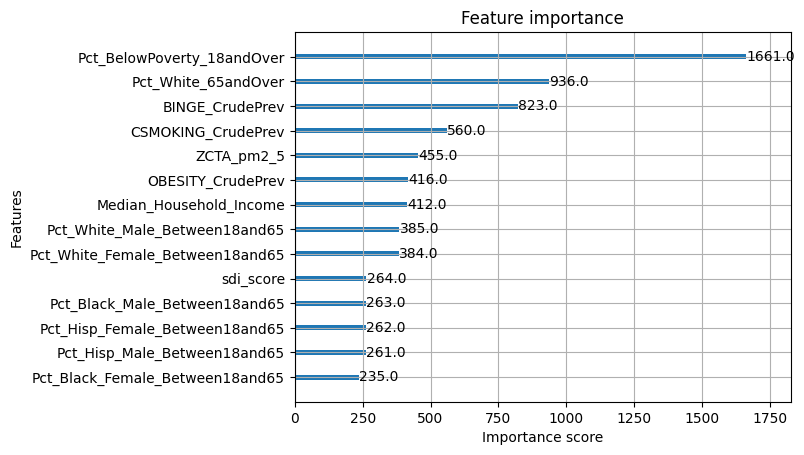

                            Feature  Importance
0        Pct_BelowPoverty_18andOver      1661.0
1               Pct_White_65andOver       936.0
2                   BINGE_CrudePrev       823.0
3                CSMOKING_CrudePrev       560.0
4                 OBESITY_CrudePrev       416.0
5           Median_Household_Income       412.0
6                        ZCTA_pm2_5       455.0
7                         sdi_score       264.0
8     Pct_White_Male_Between18and65       385.0
9   Pct_White_Female_Between18and65       384.0
10  Pct_Black_Female_Between18and65       235.0
11    Pct_Black_Male_Between18and65       263.0
12     Pct_Hisp_Male_Between18and65       261.0
13   Pct_Hisp_Female_Between18and65       262.0


In [701]:



# Plot feature importance



xgb.plot_importance(model, importance_type = "weight")




plt.show()



# Extract feature importance into a DataFrame



importance_df = pd.DataFrame(model.get_score(importance_type="weight").items(),
                             
                             
                             
    columns=["Feature", "Importance"]
                             
                             
                             
)



print(importance_df)




In [716]:
alpha_values = np.logspace(-1, 2, 100)

In [717]:
alpha_values


array([  0.1       ,   0.10722672,   0.1149757 ,   0.12328467,
         0.13219411,   0.14174742,   0.15199111,   0.16297508,
         0.17475284,   0.18738174,   0.2009233 ,   0.21544347,
         0.23101297,   0.24770764,   0.26560878,   0.28480359,
         0.30538555,   0.32745492,   0.35111917,   0.37649358,
         0.40370173,   0.43287613,   0.46415888,   0.49770236,
         0.53366992,   0.57223677,   0.61359073,   0.65793322,
         0.70548023,   0.75646333,   0.81113083,   0.869749  ,
         0.93260335,   1.        ,   1.07226722,   1.149757  ,
         1.23284674,   1.32194115,   1.41747416,   1.51991108,
         1.62975083,   1.7475284 ,   1.87381742,   2.009233  ,
         2.15443469,   2.3101297 ,   2.47707636,   2.65608778,
         2.84803587,   3.05385551,   3.27454916,   3.51119173,
         3.76493581,   4.03701726,   4.32876128,   4.64158883,
         4.97702356,   5.33669923,   5.72236766,   6.13590727,
         6.57933225,   7.05480231,   7.56463328,   8.11